In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.gridspec as gridspec # subplots
from mpl_toolkits.mplot3d import Axes3D

In [9]:
# Load the data in pandas dataframe
dataset = pd.read_csv('Data/Small_Datasets/4-wayAdditive_100feat.txt', delimiter='\t')


In [41]:
dataset

,N0,N1,N2,N3,N4,N5,N6,N7,N8,N9,...,N91,N92,N93,N94,N95,M0P1,M1P2,M2P3,M3P4,Class
0,0,1,2,1,1,0,1,0,1,0,...,1,0,0,1,0,1,0,2,0,1
1,0,0,2,1,1,0,0,0,1,1,...,2,1,1,1,2,0,1,1,2,1
2,0,1,0,1,0,0,0,2,0,0,...,0,1,1,1,1,2,0,2,0,1
3,0,1,0,1,2,1,1,2,1,1,...,1,0,0,2,1,0,1,2,1,1
4,0,0,2,0,1,0,0,1,0,0,...,0,1,0,1,1,0,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,1,1,1,0,0,0,1,0,...,1,0,1,1,2,1,2,0,0,0
996,1,1,0,1,1,1,0,1,2,1,...,2,0,2,1,1,2,1,0,0,0
997,0,1,2,0,0,0,0,0,0,1,...,1,0,0,1,1,1,2,0,0,0
998,0,0,1,1,0,0,0,0,0,0,...,1,0,1,1,0,2,2,0,1,0


In [40]:
print("Dataset:")
dataset.head()

Dataset:


,N0,N1,N2,N3,N4,N5,N6,N7,N8,N9,...,N91,N92,N93,N94,N95,M0P1,M1P2,M2P3,M3P4,Class
0,0,1,2,1,1,0,1,0,1,0,...,1,0,0,1,0,1,0,2,0,1
1,0,0,2,1,1,0,0,0,1,1,...,2,1,1,1,2,0,1,1,2,1
2,0,1,0,1,0,0,0,2,0,0,...,0,1,1,1,1,2,0,2,0,1
3,0,1,0,1,2,1,1,2,1,1,...,1,0,0,2,1,0,1,2,1,1
4,0,0,2,0,1,0,0,1,0,0,...,0,1,0,1,1,0,1,2,1,1


In [11]:
# Print the shape of each DataFrame

print("Dataset shape:", dataset.shape)

Dataset shape: (1000, 101)


In [12]:
print("Dataset rows:", dataset.shape[0])

Dataset rows: 1000


In [13]:
print("Dataset columns:", dataset.shape[1])

Dataset columns: 101


### data cleaning

In [14]:
#Checking the data info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 101 entries, N0 to Class
dtypes: int64(101)
memory usage: 789.2 KB


### checking for missing value

In [15]:
dataset.isnull()

,N0,N1,N2,N3,N4,N5,N6,N7,N8,N9,...,N91,N92,N93,N94,N95,M0P1,M1P2,M2P3,M3P4,Class
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
# Check for missing values
missing_values = dataset.isnull().sum().sum()
print("Missing values in our dataset:")
print(missing_values)

Missing values in our dataset:
0


### No Missing values present in data.
### Exploratory Data Analysis

In [17]:
dataset['Class'].value_counts()

1    500
0    500
Name: Class, dtype: int64

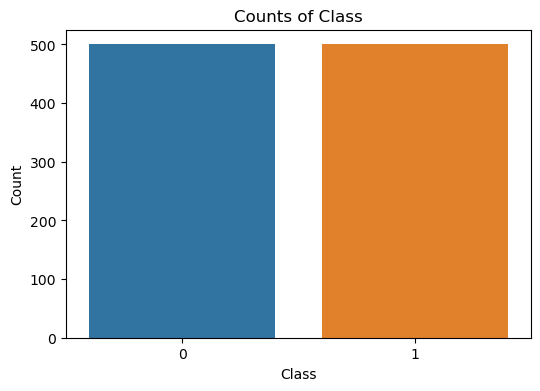

In [43]:
# plot the value counts
column_name = 'Class'
value_counts = dataset[column_name].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=value_counts.index, y=value_counts.values)
plt.title(f'Counts of {column_name}')
plt.xlabel(column_name)
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

### PCA Analysis

In [19]:
from sklearn.decomposition import PCA
X = dataset.drop('Class', axis=1)
y = dataset['Class']
# running PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
# A new DataFrame with PCA components
pca_df = pd.DataFrame(data={'PCA1': X_pca[:, 0], 
                            'PCA2': X_pca[:, 1], 'Class': y})
pca_df

,PCA1,PCA2,Class
0,-0.210857,1.458962,1
1,-0.971031,-1.115441,1
2,-0.223418,1.226519,1
3,-0.902064,-0.194553,1
4,-0.830822,0.891845,1
...,...,...,...
995,1.460840,0.049865,0
996,1.428120,-0.501230,0
997,1.535103,-0.660463,0
998,1.454393,-1.096483,0


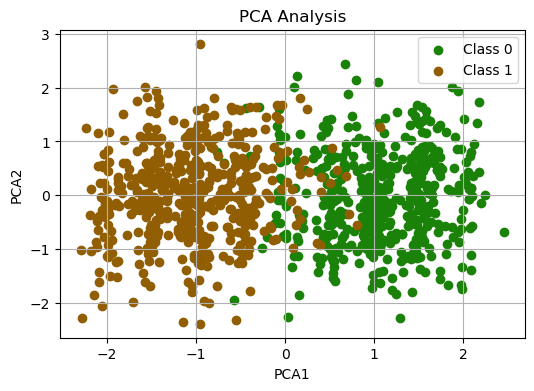

In [47]:
# Plot the PCA analysis
plt.figure(figsize=(6, 4))
plt.scatter(pca_df[pca_df['Class'] == 0]['PCA1'], 
            pca_df[pca_df['Class'] == 0]['PCA2'], 
            label='Class 0', c='#1B8209')
plt.scatter(pca_df[pca_df['Class'] == 1]['PCA1'], 
            pca_df[pca_df['Class'] == 1]['PCA2'], 
            label='Class 1', c='#915E04')
plt.title('PCA Analysis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.grid(True)
plt.show()

### Feature extracting

In [21]:
%pip install skrebate

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, f_classif
from skrebate import ReliefF

Feature Selection in dataset
Random Forest Classifier Feature Importance
M2P3    0.162812
M1P2    0.159445
M3P4    0.158365
M0P1    0.139689
N23     0.005754
N69     0.005589
N76     0.005576
N54     0.005557
N18     0.005335
N89     0.005261
dtype: float64

Feature selection using ANOVA F-statistic: 
Selected predictive features using ANOVA F-statistic: Index(['N6', 'N22', 'N50', 'N55', 'N60', 'N89', 'M0P1', 'M1P2', 'M2P3',
       'M3P4'],
      dtype='object')

Feature selection using Relief-based algorithm
Selected predictive features using Relief: Index(['M2P3', 'M0P1', 'M1P2', 'M3P4', 'N15', 'N87', 'N22', 'N66', 'N6',
       'N73'],
      dtype='object')


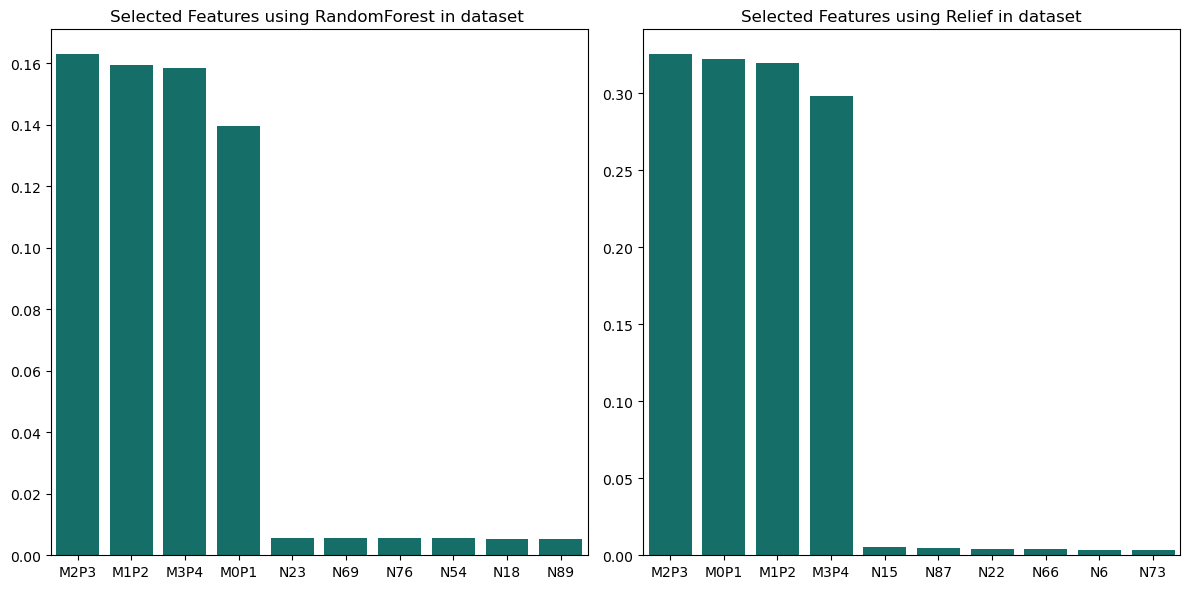

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from skrebate import ReliefF

def calculateFeatureImportance(data, datasetName, k):
    print(f"Feature Selection in {datasetName}")
    # Extract features (X) and class labels (y)
    X = data.drop('Class', axis=1)
    y = data['Class']

    # Perform feature selection using a machine learning model (Random Forest)
    clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=4)
    clf.fit(X, y)

    # Visualize feature importances
    feature_importances = clf.feature_importances_
    
    print("Random Forest Classifier Feature Importance")
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title(f"Selected Features using RandomForest in {datasetName} ")
    feature_scores_rf = pd.Series(feature_importances, index=X.columns).sort_values(ascending=False)
    print(feature_scores_rf[:10])
    sns.barplot(x=feature_scores_rf[:10].index, y=feature_scores_rf[:10], color='#067D74')
    
    # Feature selection using ANOVA F-statistic
    print("\nFeature selection using ANOVA F-statistic: ")
    selector = SelectKBest(score_func=f_classif, k=k)
    selector.fit(X, y)
    # Display the names of the selected features
    selected_feature_names_anova = X.columns[selector.get_support()]
    print("Selected predictive features using ANOVA F-statistic:", selected_feature_names_anova)
    
    # Feature selection using Relief-based algorithm
    print("\nFeature selection using Relief-based algorithm")
    # Initialize the ReliefF feature selector
    relief = ReliefF(n_features_to_select=k)

    # Fit the ReliefF selector to the data
    X_selected_relief = relief.fit_transform(X.values, y.values)

    # Retrieve the names of the selected features
    selected_feature_names_relief = X.columns[relief.top_features_[:k]]

    print("Selected predictive features using Relief:", selected_feature_names_relief)

    plt.subplot(1, 2, 2)
    plt.title(f"Selected Features using Relief in {datasetName}")
    # Assigning different heights to selected features based on their Relief scores
    selected_features_relief_scores = relief.feature_importances_[relief.top_features_[:k]]
    sns.barplot(x=X.columns[relief.top_features_[:k]], y=selected_features_relief_scores, color='#067D74')
    plt.tight_layout()
    plt.show()

    return feature_importances, selector, relief

# Assuming `dataset` is your dataset
feature_importances, selector, relief = calculateFeatureImportance(dataset,"dataset", 10)


### Model Building for our dataset

In [59]:
dataset.head()

,N0,N1,N2,N3,N4,N5,N6,N7,N8,N9,...,N91,N92,N93,N94,N95,M0P1,M1P2,M2P3,M3P4,Class
0,0,1,2,1,1,0,1,0,1,0,...,1,0,0,1,0,1,0,2,0,1
1,0,0,2,1,1,0,0,0,1,1,...,2,1,1,1,2,0,1,1,2,1
2,0,1,0,1,0,0,0,2,0,0,...,0,1,1,1,1,2,0,2,0,1
3,0,1,0,1,2,1,1,2,1,1,...,1,0,0,2,1,0,1,2,1,1
4,0,0,2,0,1,0,0,1,0,0,...,0,1,0,1,1,0,1,2,1,1


In [60]:
features = dataset.iloc[:,-5:-1]
features

,M0P1,M1P2,M2P3,M3P4
0,1,0,2,0
1,0,1,1,2
2,2,0,2,0
3,0,1,2,1
4,0,1,2,1
...,...,...,...,...
995,1,2,0,0
996,2,1,0,0
997,1,2,0,0
998,2,2,0,1


In [61]:
labels = dataset['Class']
labels

0      1
1      1
2      1
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Class, Length: 1000, dtype: int64

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [63]:
# Split the data into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42,stratify=labels)

In [64]:
y_train.value_counts()

1    400
0    400
Name: Class, dtype: int64

In [65]:
dataset['Class'].unique()

array([1, 0], dtype=int64)

In [66]:
# classifiers
classifiers = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Support Vector Machine', SVC(probability=True, random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier())
]

# evaluation metrics
accuracy_scores = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}
# confusion matrix
confusion_matrices = {}

In [67]:
# training and validation
for name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    y_prob = classifier.predict_proba(X_test)[:, 1]

    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[name] = cm
    accuracy_scores[name] = accuracy_score(y_test, y_pred)
    precision_scores[name] = precision_score(y_test, y_pred, average='weighted')
    recall_scores[name] = recall_score(y_test, y_pred, average='weighted')
    f1_scores[name] = f1_score(y_test, y_pred, average='weighted')

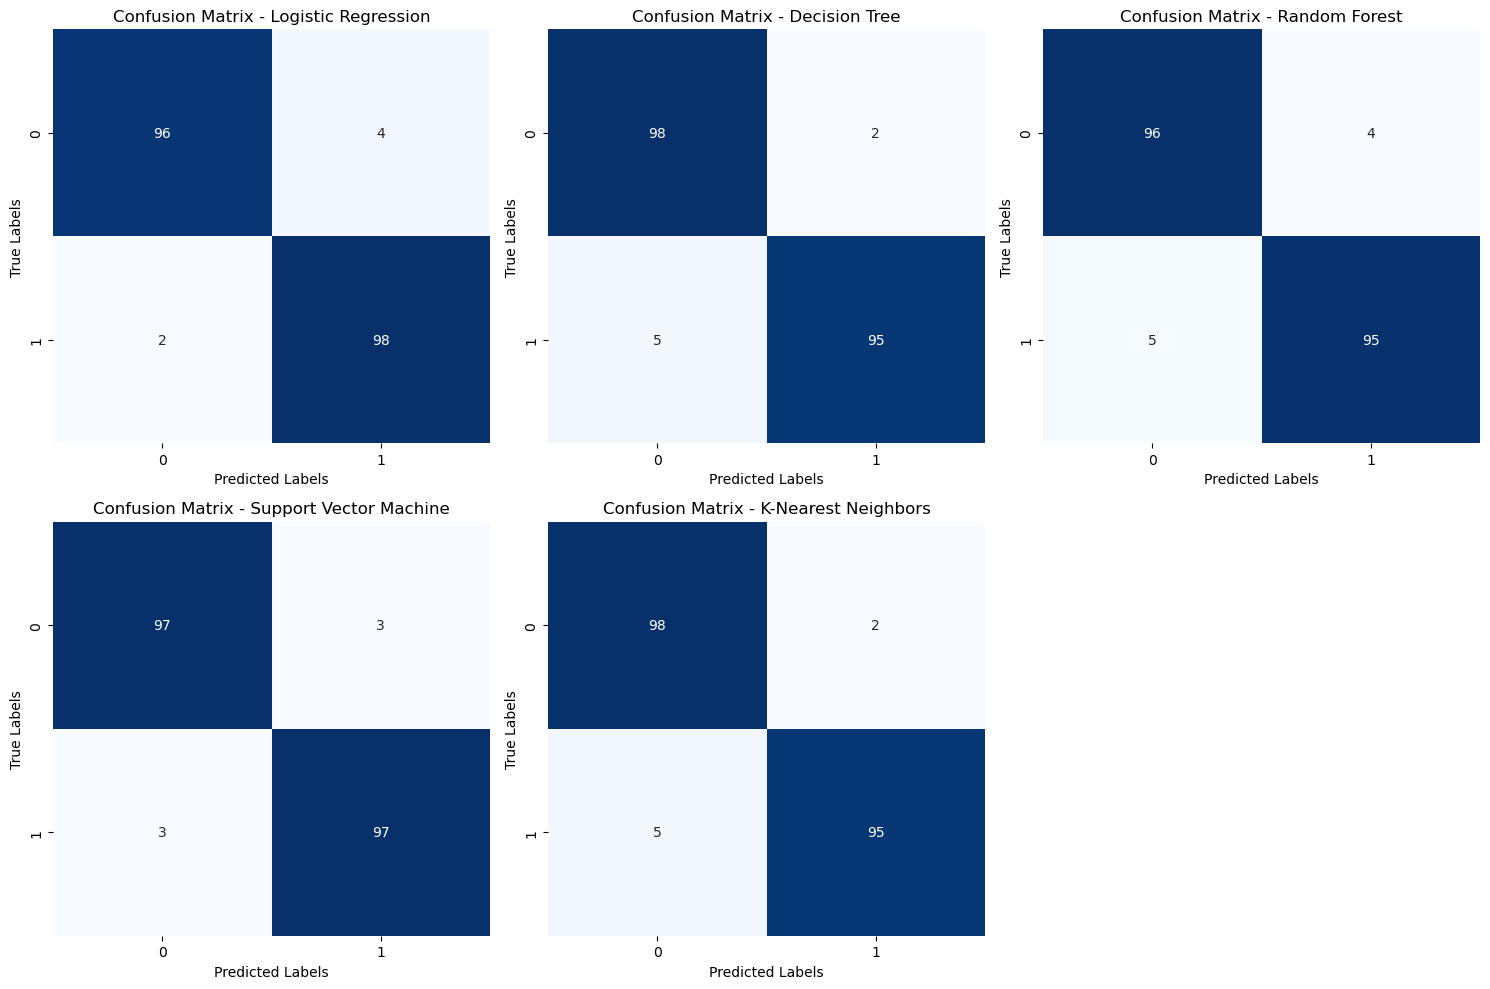

In [34]:
# Plot the confusion matrices
plt.figure(figsize=(15, 10))

for i, (name, cm) in enumerate(confusion_matrices.items(), 1):
    plt.subplot(2, 3, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')

plt.tight_layout()
plt.savefig('confusion-matix-four_way_additive.png',dpi=300,bbox_inches='tight')
plt.show()

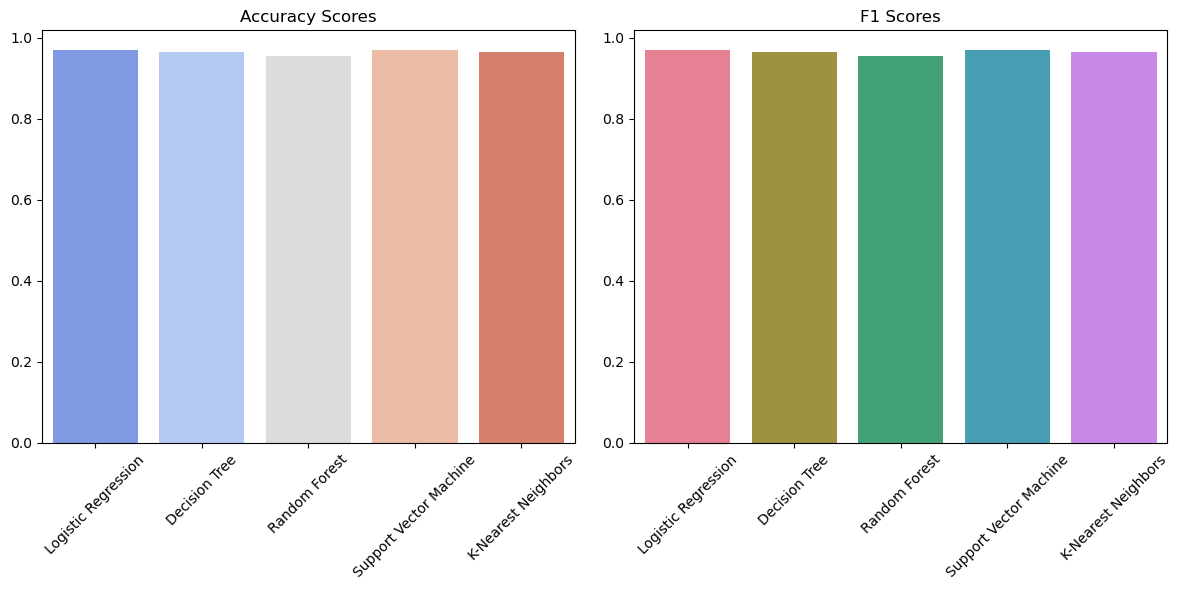

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Define custom color palettes
accuracy_colors = sns.color_palette('coolwarm', len(accuracy_scores))
f1_colors = sns.color_palette('husl', len(f1_scores))

# Plot evaluation metrics
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), hue=list(accuracy_scores.keys()), palette=accuracy_colors, dodge=False)
plt.title('Accuracy Scores')
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)

plt.subplot(1, 2, 2)
sns.barplot(x=list(f1_scores.keys()), y=list(f1_scores.values()), hue=list(f1_scores.keys()), palette=f1_colors, dodge=False)
plt.title('F1 Scores')
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)

plt.tight_layout()
plt.show()


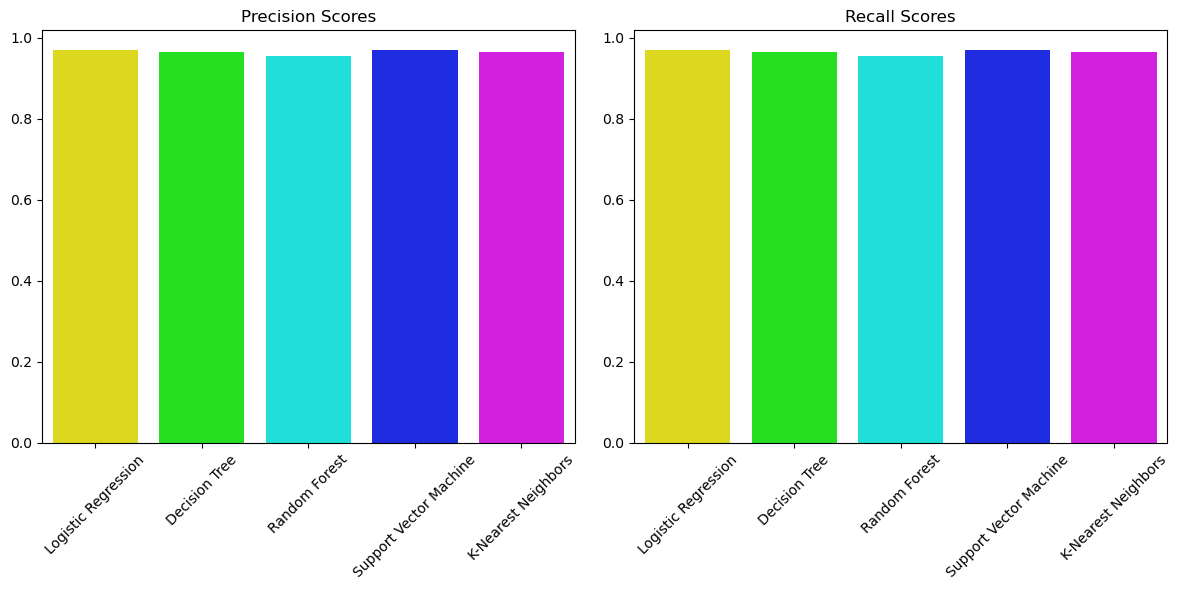

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Define custom color palette
colors = sns.color_palette('hsv', len(precision_scores))

# Plot evaluation metrics
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=list(precision_scores.keys()), y=list(precision_scores.values()), hue=list(precision_scores.keys()), palette=colors, dodge=False)
plt.title('Precision Scores')
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)

plt.subplot(1, 2, 2)
sns.barplot(x=list(recall_scores.keys()), y=list(recall_scores.values()), hue=list(recall_scores.keys()), palette=colors, dodge=False)
plt.title('Recall Scores')
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)

plt.tight_layout()
plt.show()

In [70]:
accuracy_scores

{'Logistic Regression': 0.97,
 'Decision Tree': 0.965,
 'Random Forest': 0.955,
 'Support Vector Machine': 0.97,
 'K-Nearest Neighbors': 0.965}

In [71]:
f1_scores

{'Logistic Regression': 0.9699969996999698,
 'Decision Tree': 0.9649921232277262,
 'Random Forest': 0.9549988749718742,
 'Support Vector Machine': 0.97,
 'K-Nearest Neighbors': 0.9649921232277262}

In [38]:
precision_scores

{'Logistic Regression': 0.970188075230092,
 'Decision Tree': 0.9654188769892903,
 'Random Forest': 0.955045504550455,
 'Support Vector Machine': 0.97,
 'K-Nearest Neighbors': 0.9654188769892903}

In [72]:
recall_scores

{'Logistic Regression': 0.97,
 'Decision Tree': 0.965,
 'Random Forest': 0.955,
 'Support Vector Machine': 0.97,
 'K-Nearest Neighbors': 0.965}